In [142]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **ĐỌC DỮ LIỆU TỪ GOOGLE DRIVE**

In [143]:
%ls

 housing.csv  'Housing predictive model.ipynb'   housing.tgz


In [144]:
%cd "/content/drive/MyDrive/Artificial Intelligence"

/content/drive/MyDrive/Artificial Intelligence


In [145]:
%ls

'Modeling house price prediction using ML'/


In [146]:
%cd 'Modeling house price prediction using ML'

/content/drive/MyDrive/Artificial Intelligence/Modeling house price prediction using ML


In [147]:
import pandas as pd 
import numpy as np

In [148]:
housing = pd.read_csv("housing.csv")

# **MÔ TẢ TỔNG QUAN VỀ DỮ LIỆU**

In [149]:
housing.describe()
#Các hàng 25%, 50%, 75% cho biết 'bách phân vị'(percentile): tương ứng % số liệu có giá trị thấp hoặc cao hơn một mức ngưỡng cho trước.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [150]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [151]:
housing.shape

(20640, 10)

In [152]:
housing.info

<bound method DataFrame.info of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  

In [153]:
housing['ocean_proximity'].value_counts()
#Có 6531 bản ghi có giá trị 'ocean_promaxity' là 'INLAND', 2658 bản ghi có giá trị 'NEAR OCEAN', v.v.

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# **TRỰC QUAN HÓA TẦN SUẤT DỮ LIỆU BẰNG ĐỒ THỊ**

In [154]:
from matplotlib import pyplot as plt

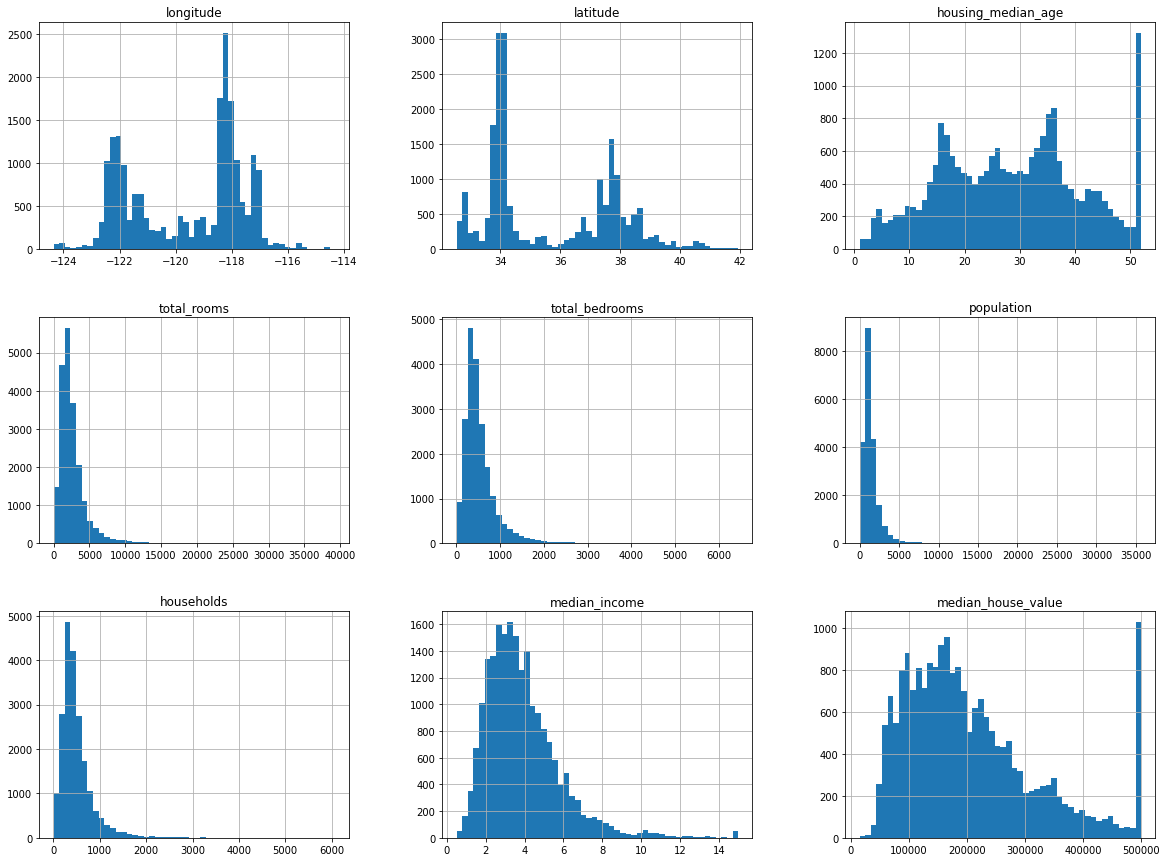

In [155]:
housing.hist(bins=50, figsize=(20,15))
plt.show()
#Vẽ biểu đồ tần suất giá trị của các thuộc tính trong bản ghi

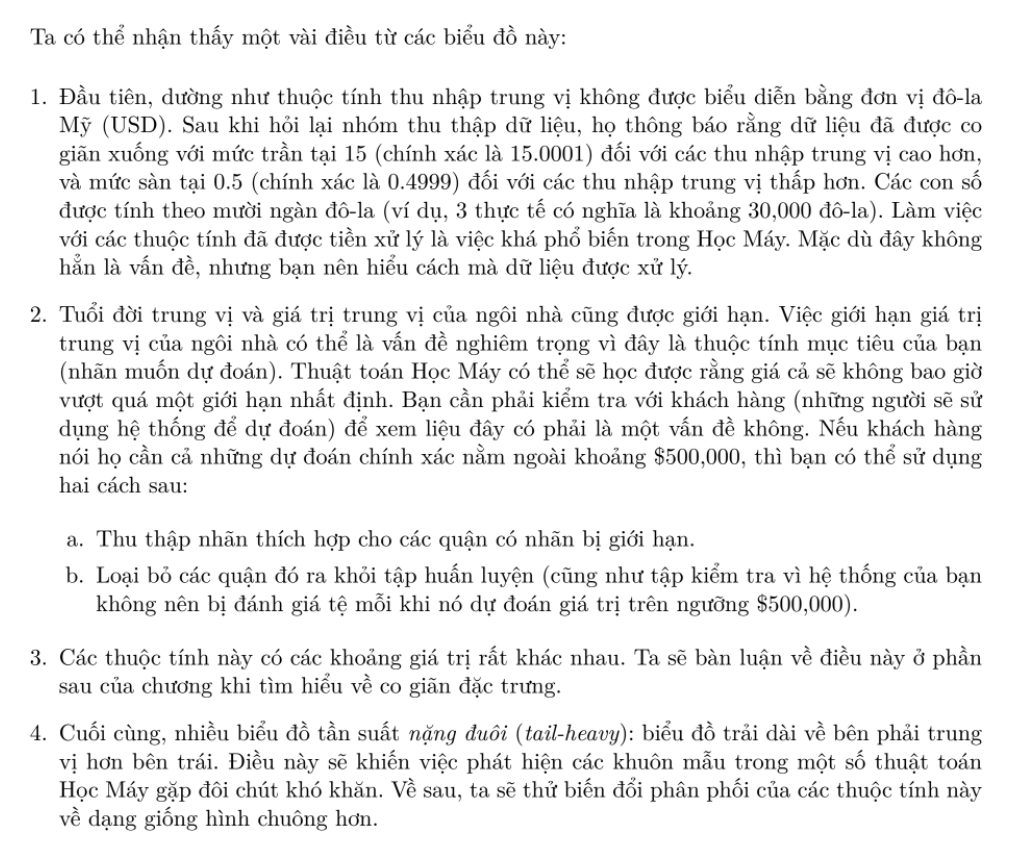

# **CHIA MẪU DỰ LIỆU RA THÀNH 2 BỘ TRAIN VÀ TEST**

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
#Chia bộ dữ liệu thành 2 phần với phần Test chiếm 20% dữ liệu

In [158]:
train_set.shape

(16512, 10)

In [159]:
train_set.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.582290,35.643149,28.608285,2642.004784,538.496851,1426.453004,499.986919,3.880754,207194.693738
std,2.005654,2.136665,12.602499,2174.646744,419.007096,1137.056380,380.967964,1.904294,115622.626448
min,-124.350000,32.550000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.810000,33.930000,18.000000,1454.000000,296.750000,789.000000,280.000000,2.566700,119800.000000
50%,-118.510000,34.260000,29.000000,2129.000000,437.000000,1167.000000,410.000000,3.545800,179850.000000
75%,-118.010000,37.720000,37.000000,3160.000000,647.000000,1726.000000,606.000000,4.773175,265125.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [160]:
test_set.shape

(4128, 10)

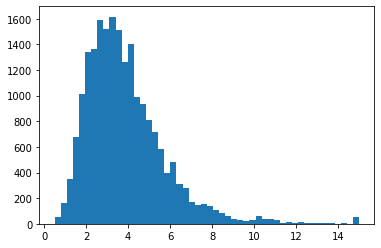

In [161]:
plt.hist(housing['median_income'], bins=50)
plt.show()

#Thực hành chuẩn hóa dữ liệu về dạng 'stratified'
1. Việc mẫu dữ liệu thu thập phải đại diện cho toàn bộ làm giảm thiểu khả năng sai số trong tính toán. VD: Dân số VN có tỉ lệ nam/nữ là 5.5/4.5, khi cần thu nhập 1000 bản ghi, ta cố gắng duy trì tỉ lệ này với 550 nam và 450 nữ.

2. Theo đó, 'median_income'-Thu nhập trung bình hiện tại đang trải đều trên các tập. Việc cần làm là phải đưa thuộc tính này về các mức nhất định (Tìm trung vị). Khi đó với mỗi tầng của mức thu nhập, các mẫu dữ liệu sẽ mang tính đại diện cao hơn

In [162]:
housing['income_cat'] = pd.cut(housing['median_income'],
                               bins=[0. ,1.5 ,3.0 , 4.5, 6., np.inf],
                                     labels=[1, 2, 3, 4, 5])
#Chia dữ liệu 'median_income' về các mốc:
#1  | 0
#2  | 1.5
#3  | 3
#4  | 4.5  
#5  | 6
#6  | inf

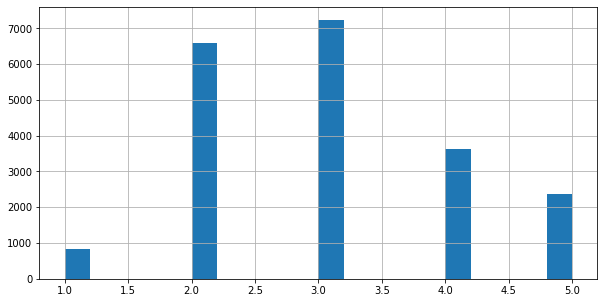

In [163]:
housing['income_cat'].hist(bins=20, figsize=(10,5))
plt.show()

3. Thực hiện lại việc chọn lại mẫu dựa trên các mức thu nhập đề ra

In [164]:
from sklearn.model_selection import StratifiedShuffleSplit

In [165]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [166]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]

In [167]:
stratified_train_set['income_cat'].value_counts() / len(stratified_train_set)
#Tính xác suất của mỗi label trong 'income_cat'

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

4. Loại bỏ thuộc tính 'income_cat' để trở lại tệp dữ liệu ban đầu

In [168]:
for set_ in (stratified_train_set, stratified_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

In [169]:
stratified_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [170]:
stratified_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
12182,-117.29,33.72,19.0,2248.0,427.0,1207.0,368.0,2.8170,110000.0,<1H OCEAN
7275,-118.24,33.99,33.0,885.0,294.0,1270.0,282.0,2.1615,118800.0,<1H OCEAN
17223,-119.72,34.44,43.0,1781.0,342.0,663.0,358.0,4.7000,293800.0,<1H OCEAN
10786,-117.91,33.63,30.0,2071.0,412.0,1081.0,412.0,4.9125,335700.0,<1H OCEAN


# **KHÁM PHÁ VÀ TRỰC QUAN HÓA DỮ LIỆU ĐỂ HIỂU**

**Trực quan hóa dữ liệu địa lý**

In [171]:
housing = stratified_train_set.copy()

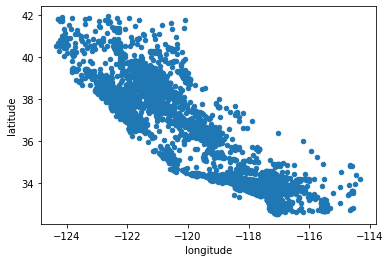

In [172]:
housing.plot(kind='scatter', x='longitude', y='latitude')
plt.show()

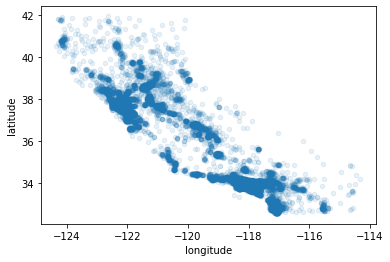

In [173]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()
#alpha = [0,1] : độ sáng của các phần tử nhằm làm nổi bật mật độ của các phần tử

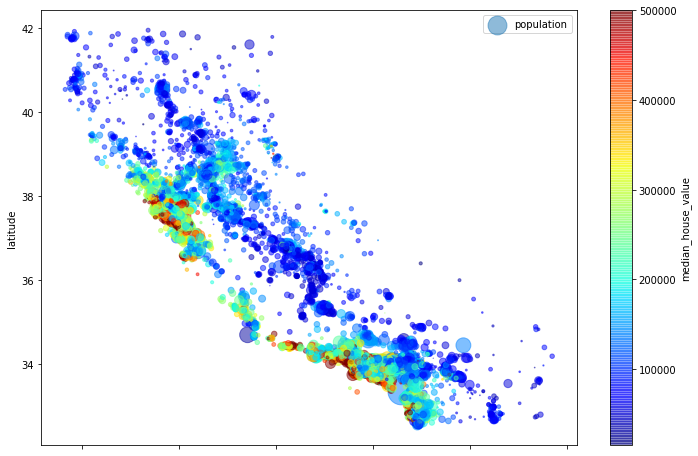

In [174]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
                  s=housing['population']/50, label='population', figsize=(12,8),
                  c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

*Biểu đồ cho thấy giá nhà có sự liên quan nhất thiết đến vị trí, dân số*

**Tìm sự tương quan**

In [175]:
corr_matrix = housing.corr()

In [176]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [177]:
corr_matrix['median_house_value'].sort_values(ascending=True)

latitude             -0.142673
longitude            -0.047466
population           -0.026882
total_bedrooms        0.047781
households            0.064590
housing_median_age    0.114146
total_rooms           0.135140
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [178]:
from pandas.plotting import scatter_matrix

In [179]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

In [180]:
attributes

['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']

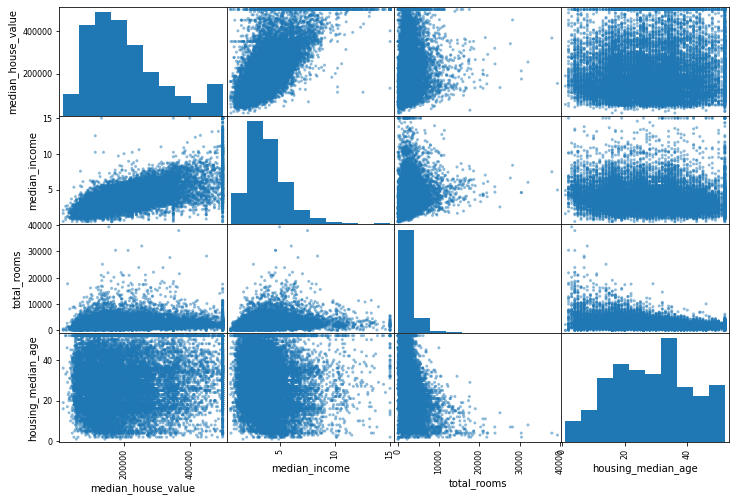

In [181]:
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

  *Ma trận đồ thị phân tán biểu diễn mối quan hệ giữa các thuộc tính số với nhau và các biểu đồ tần số của mỗi thuộc tính số*

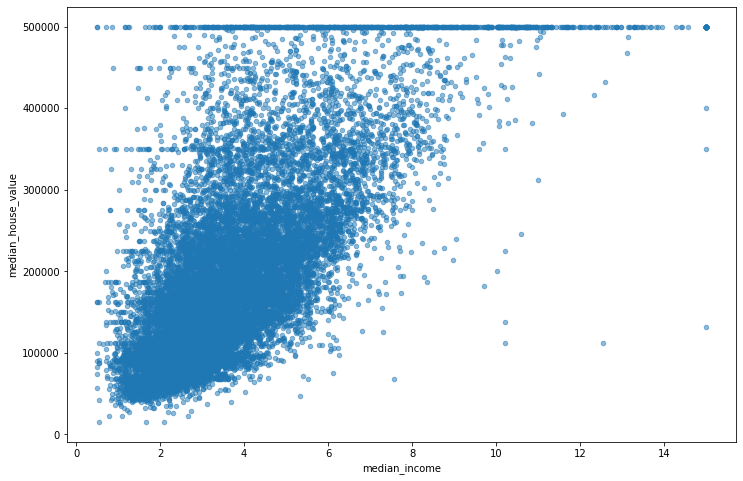

In [182]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha = 0.5, figsize=(12,8))
plt.show()

*Biểu đồ thể hiện mối quan hệ giữa thu nhập trung bình và giá nhà ở trung bình*

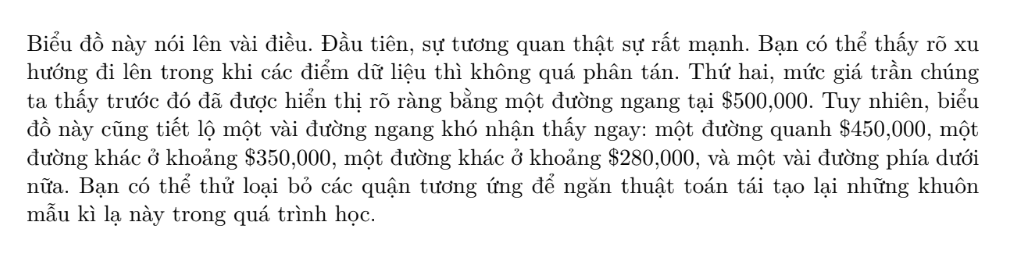

**Kết hợp các thuộc tính**

In [183]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']
#Tạo ra các thuộc tính mới có ích hơn các thuộc tính ban đầu

In [184]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466,-0.028374,0.095645,-0.000415
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673,0.107665,-0.116955,0.005426
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146,-0.147184,0.136768,0.015031
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140,0.127549,-0.192655,-0.024806
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781,0.000426,0.086883,-0.028364
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882,-0.074665,0.037736,0.076232
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590,-0.082971,0.067090,-0.027411
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151,0.311528,-0.624650,0.021815
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000,0.146255,-0.259952,-0.021991
rooms_per_household,-0.028374,0.107665,-0.147184,0.127549,0.000426,-0.074665,-0.082971,0.311528,0.146255,1.000000,-0.398529,-0.005316


In [185]:
corr_matrix['median_house_value'].sort_values(ascending=True)

bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64

**Chuẩn bị dữ liệu cho Thuật toán Học Máy**

In [186]:
housing = stratified_train_set.drop('median_house_value', axis=1)
housing_value = stratified_train_set['median_house_value'].copy()
#Tách dữ liệu giá nhà và các thuộc tính khác ra thành 2 trường riêng biệt

**Làm sạch dữ liệu**

In [187]:
median = housing['total_bedrooms'].median()
median
#Tính trung vị của 'total bedrooms'

433.0

In [188]:
housing['total_bedrooms'].fillna(median, inplace=True)

Thuộc tính 'total_bedrooms' có một số bản ghi bị thiếu, do đó ta sử dụng giá trị trung vị để gán cho tất cả các bản ghi

In [189]:
from sklearn.impute import SimpleImputer

In [190]:
imputer = SimpleImputer(strategy='median')

In [191]:
housing_op = housing.drop('ocean_proximity', axis=1)
housing_op

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [192]:
imputer.fit(housing_op)

SimpleImputer(strategy='median')

In [193]:
X = imputer.transform(housing_op)
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [194]:
housing_tr = pd.DataFrame(X, columns=housing_op.columns, index=housing_op.index)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


**Xử lý các thuộc tính văn bản và hạng mục**

In [195]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [196]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [197]:
housing_cat.iloc[1, 0]

'NEAR OCEAN'

Sử dụng one-hot encoding để tăng tính chính xác khí biểu diễn các hạng mục văn bản

In [198]:
from sklearn.preprocessing import OneHotEncoder

In [199]:
cat_encoder = OneHotEncoder()
housing_cat_1h = cat_encoder.fit_transform(housing_cat)
housing_cat_1h                                           

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [200]:
housing_cat_1h.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

**Bộ biến đổi tùy chỉnh**

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin

In [202]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        rooms_per_households = X[:, rooms_ix] / X[:, households_ix]
        population_per_households = X[:, population_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_households, population_per_households, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_households, population_per_households]

attributes_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attributes = attributes_adder.transform(housing.values)
housing_extra_attributes

array([[-121.46, 38.52, 29.0, ..., 'INLAND', 5.485835694050992,
        0.5775884327394785],
       [-117.23, 33.09, 7.0, ..., 'NEAR OCEAN', 6.927083333333333,
        0.37875939849624063],
       [-119.04, 35.37, 44.0, ..., 'INLAND', 5.3933333333333335,
        0.4122373300370828],
       ...,
       [-122.72, 38.44, 48.0, ..., '<1H OCEAN', 4.1104651162790695,
        0.6478076379066479],
       [-122.7, 38.31, 14.0, ..., '<1H OCEAN', 6.297405189620759,
        0.38288431061806655],
       [-122.14, 39.97, 27.0, ..., 'INLAND', 5.477157360406092,
        0.5792400370713624]], dtype=object)

**Pipeline Biến đổi**

In [203]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [204]:
num_pipeline = Pipeline([
                         ('imputer', SimpleImputer(strategy='median')),
                         ('attributes_adder', CombineAttributesAdder()),
                         ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_op)
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
        -0.01496682, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.07648537, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.06612715, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
         0.00675931,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.0752091 , -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
        -0.0144558 , -0.12169672]])

In [205]:
from sklearn.compose import ColumnTransformer

In [206]:
num_attributes = list(housing_op)
cat_attributes = ['ocean_proximity']

full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attributes), 
                                   ('cat', OneHotEncoder(), cat_attributes),
])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

# **CHỌN VÀ HUẤN LUYỆN MÔ HÌNH**

**1. Mô hình Hồi quy Tuyến tính (Linear Regression)**

In [207]:
from sklearn.linear_model import LinearRegression

In [208]:
lin_reg = LinearRegression() #Hồi quy Tuyến tính
lin_reg.fit(housing_prepared, housing_value)

LinearRegression()

In [209]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [210]:
some_value = housing_value.iloc[:5]
some_value

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

In [211]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526, -0.01496682,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.07648537,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.06612715,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.04564902,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

Mô hình thực hiện dự đoán dựa trên bộ dữ liệu đưa vào

In [212]:
print('Prediction:', lin_reg.predict(some_data_prepared))

Prediction: [ 85749.86374743 305433.2153269  152019.84439021 185977.83516103
 244556.65849285]


So với kết quả ban đầu

In [213]:
print('Values:', list(some_value))

Values: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


Đo RMSE của mô hình

In [214]:
from sklearn.metrics import mean_squared_error

In [215]:
housing_predictions = lin_reg.predict(housing_prepared)

In [216]:
lin_mse = mean_squared_error(housing_value, housing_predictions)
lin_mse

4710626033.007174

In [217]:
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68634.00056099873

**2. Mô hình Hồi quy Cây Quyết định (Decision Tree Regressor)**

In [218]:
from sklearn.tree import DecisionTreeRegressor

In [219]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_value)

DecisionTreeRegressor()

In [220]:
housing_predictions = tree_reg.predict(housing_prepared)
print('Prediction:', housing_predictions)
print('Value', list(housing_value))

Prediction: [ 72100. 279600.  82700. ... 140400. 258100.  62700.]
Value [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0, 57500.0, 350000.0, 238800.0, 80300.0, 200400.0, 333700.0, 158000.0, 276800.0, 327200.0, 194500.0, 163100.0, 331200.0, 92000.0, 153400.0, 139100.0, 85900.0, 238100.0, 173500.0, 196100.0, 442900.0, 234600.0, 195400.0, 264100.0, 415800.0, 282300.0, 345200.0, 85000.0, 279400.0, 95700.0, 191800.0, 225400.0, 163500.0, 150300.0, 217100.0, 157500.0, 163200.0, 105100.0, 213700.0, 98200.0, 235300.0, 182400.0, 390800.0, 179900.0, 46700.0, 339800.0, 151400.0, 105000.0, 183300.0, 125700.0, 123600.0, 249400.0, 152600.0, 293300.0, 116700.0, 133000.0, 261900.0, 87500.0, 126500.0, 261600.0, 225800.0, 196500.0, 109800.0, 174400.0, 217700.0, 172400.0, 325000.0, 132200.0, 184800.0, 163700.0, 142500.0, 50000.0, 307400.0, 253700.0, 340400.0, 72300.0, 121800.0, 85000.0, 148200.0, 118800.0, 263100.0, 344200.0, 315600.0, 156000.0, 136300.0, 3

Đo RMSE của mô hình

In [221]:
tree_mse = mean_squared_error(housing_value, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**3. Mô hình Rừng ngẫu nhiên (Random Forest Regressor)**

In [222]:
from sklearn.ensemble import RandomForestRegressor

In [223]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_value)

RandomForestRegressor()

In [224]:
housing_predictions = forest_reg.predict(housing_prepared)
print('Prediction:', housing_predictions)
print('Value', list(housing_value))

Prediction: [ 75726.   292193.01  82178.   ... 144455.   248622.    74407.  ]
Value [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0, 57500.0, 350000.0, 238800.0, 80300.0, 200400.0, 333700.0, 158000.0, 276800.0, 327200.0, 194500.0, 163100.0, 331200.0, 92000.0, 153400.0, 139100.0, 85900.0, 238100.0, 173500.0, 196100.0, 442900.0, 234600.0, 195400.0, 264100.0, 415800.0, 282300.0, 345200.0, 85000.0, 279400.0, 95700.0, 191800.0, 225400.0, 163500.0, 150300.0, 217100.0, 157500.0, 163200.0, 105100.0, 213700.0, 98200.0, 235300.0, 182400.0, 390800.0, 179900.0, 46700.0, 339800.0, 151400.0, 105000.0, 183300.0, 125700.0, 123600.0, 249400.0, 152600.0, 293300.0, 116700.0, 133000.0, 261900.0, 87500.0, 126500.0, 261600.0, 225800.0, 196500.0, 109800.0, 174400.0, 217700.0, 172400.0, 325000.0, 132200.0, 184800.0, 163700.0, 142500.0, 50000.0, 307400.0, 253700.0, 340400.0, 72300.0, 121800.0, 85000.0, 148200.0, 118800.0, 263100.0, 344200.0, 315600.0, 156000.0,

In [225]:
forest_mse = mean_squared_error(housing_value, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18338.70216859874

# **KIỂM ĐỊNH CHÉO: PHƯƠNG PHÁP ĐÁNH GIÁ TỐT HƠN**

In [226]:
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard devitation:', scores.std())

1. Kiểm định mô hình Hồi quy Tuyến tính

In [227]:
from sklearn.model_selection import cross_val_score

In [228]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_value,
                              scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [71747.47345836 64119.2533148  67651.45880458 68664.27200399
 67420.92576712 72534.71844609 74019.63215464 68820.88568643
 66445.90842704 70143.35199184]
Mean: 69156.78800548989
Standard devitation: 2847.8568580165825


2. Kiểm định mô hình Cây Quyết định

In [229]:
tree_scores = cross_val_score(tree_reg, housing_prepared, 
                         housing_value, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [230]:
display_scores(tree_rmse_scores)

Scores: [68550.23035524 67885.97255706 68553.17323378 73096.90968415
 72076.8616009  75633.45102562 74087.95899063 72618.2560674
 69809.22106723 73164.9678994 ]
Mean: 71547.70024814084
Standard devitation: 2529.240148166107


3. Kiếm định mô hình Rừng ngẫu nhiên

In [231]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_value, 
                                scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [50408.32030522 47692.87838496 46472.95690088 50593.44887322
 46670.13052418 50318.4139577  50467.38990931 49545.33510988
 47286.09556291 53585.37305477]
Mean: 49304.034258302185
Standard devitation: 2127.7414309502906


***Trong 3 mô hình đã sử dụng phía trên, Rừng ngẫu nhiên cho kết quả khả quan nhất, điều bất ngờ đã xảy ra khi mô hình Cây Quyết định cho ra số điểm thấp hơn cả Hồi quy Tuyến tính***

# **TINH CHỈNH MÔ HÌNH**

1. Tìm kiếm dạng lưới

In [232]:
from sklearn.model_selection import GridSearchCV

In [233]:
param_grid = [
              {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

In [234]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_value)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [235]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [236]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [237]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63857.46019493278 {'max_features': 2, 'n_estimators': 3}
55033.11928673236 {'max_features': 2, 'n_estimators': 10}
52739.34405876096 {'max_features': 2, 'n_estimators': 30}
60925.336568005034 {'max_features': 4, 'n_estimators': 3}
53265.38086211243 {'max_features': 4, 'n_estimators': 10}
50188.696815542215 {'max_features': 4, 'n_estimators': 30}
59462.88029168877 {'max_features': 6, 'n_estimators': 3}
52086.67646438777 {'max_features': 6, 'n_estimators': 10}
49818.141507114946 {'max_features': 6, 'n_estimators': 30}
58542.04363410247 {'max_features': 8, 'n_estimators': 3}
51431.61515494826 {'max_features': 8, 'n_estimators': 10}
49551.51270322012 {'max_features': 8, 'n_estimators': 30}
62251.30607872959 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54241.18284634987 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59597.73389006213 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52675.259719770154 {'bootstrap': False, 'max_features': 3, 'n_estimators'

2. Phân tích các Mô hình Tốt nhất và Lỗi của chúng

In [238]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.81258516e-02, 6.93286915e-02, 4.08861885e-02, 1.42663289e-02,
       1.45026041e-02, 1.59927970e-02, 1.45550881e-02, 3.08861783e-01,
       4.05148288e-02, 1.45545073e-01, 8.16745525e-02, 1.07820695e-02,
       1.59355751e-01, 2.36243223e-05, 2.35230041e-03, 3.23246790e-03])

In [239]:
extra_attributes = ['rooms_per_households', 'population_per_households', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_1h_attributes = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attributes + cat_1h_attributes
sorted(zip(feature_importances, attributes), reverse=True)

[(0.30886178256814384, 'median_income'),
 (0.15935575093336285, 'INLAND'),
 (0.14554507336870032, 'population_per_households'),
 (0.08167455250594118, 'bedrooms_per_room'),
 (0.07812585155371154, 'longitude'),
 (0.06932869152978606, 'latitude'),
 (0.04088618849706345, 'housing_median_age'),
 (0.04051482880762307, 'rooms_per_households'),
 (0.015992797009930657, 'population'),
 (0.014555088129536113, 'households'),
 (0.014502604081875835, 'total_bedrooms'),
 (0.01426632892150994, 'total_rooms'),
 (0.01078206946089172, '<1H OCEAN'),
 (0.003232467896717341, 'NEAR OCEAN'),
 (0.0023523004129016533, 'NEAR BAY'),
 (2.3624322304476764e-05, 'ISLAND')]

# TRIỂN KHAI MÔ HÌNH

In [240]:
final_model = grid_search.best_estimator_

In [241]:
X_test = stratified_test_set.drop('median_house_value', axis=1)
y_test = stratified_test_set['median_house_value'].copy()

In [242]:
X_test_prepared = full_pipeline.transform(X_test)

In [243]:
final_predictions = final_model.predict(X_test_prepared)

In [244]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47109.786206939374